In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [84]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [85]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [87]:
train_data = train_data.drop('Name', axis = 1)
train_data = train_data.drop('Ticket', axis = 1)
train_data = train_data.drop('Embarked', axis = 1)
test_data = test_data.drop('Name', axis = 1)
test_data = test_data.drop('Ticket', axis = 1)
test_data = test_data.drop('Embarked', axis = 1)

In [88]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [89]:
train_data['Cabin'] = train_data['Cabin'].astype(str).str[:1]
#train_data['Embarked'] = train_data['Embarked'].astype(str).str[:1]
test_data['Cabin'] = test_data['Cabin'].astype(str).str[:1]
#test_data['Embarked'] = test_data['Embarked'].astype(str).str[:1]
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,n
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,n
3,4,1,1,female,35.0,1,0,53.1000,C
4,5,0,3,male,35.0,0,0,8.0500,n
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,n
887,888,1,1,female,19.0,0,0,30.0000,B
888,889,0,3,female,NaN,1,2,23.4500,n
889,890,1,1,male,26.0,0,0,30.0000,C


In [90]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,3,male,34.5,0,0,7.8292,n
1,893,3,female,47.0,1,0,7.0000,n
2,894,2,male,62.0,0,0,9.6875,n
3,895,3,male,27.0,0,0,8.6625,n
4,896,3,female,22.0,1,1,12.2875,n
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,n
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,n
416,1308,3,male,NaN,0,0,8.0500,n


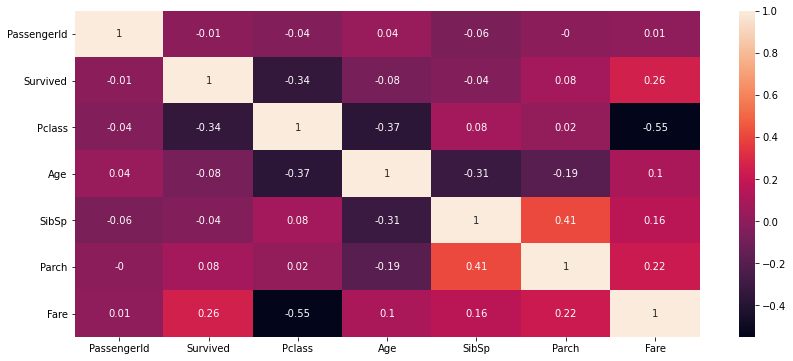

In [91]:
corr_matrix = train_data.corr().round(2)
plt.figure(figsize = (14,6))
sns.heatmap(corr_matrix,annot = True)

In [92]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder()

categories_encoded = pd.DataFrame(enc.fit_transform(train_data[['Sex']]).toarray())
categories_encoded.columns = enc.get_feature_names(['Sex'])
train_data = pd.concat([train_data, categories_encoded], axis=1)
train_data = train_data.drop('Sex', axis = 1)


categories_encoded = pd.DataFrame(enc.fit_transform(train_data[['Cabin']]).toarray())
categories_encoded.columns = enc.get_feature_names(['Cabin'])
train_data = pd.concat([train_data, categories_encoded], axis=1)
train_data = train_data.drop('Cabin', axis = 1)
#train_data = train_data.drop('Cabin_n', axis = 1)

"""
categories_encoded = pd.DataFrame(enc.fit_transform(train_data[['Embarked']]).toarray())
categories_encoded.columns = enc.get_feature_names(['Embarked'])
train_data = pd.concat([train_data, categories_encoded], axis=1)
train_data = train_data.drop('Embarked', axis = 1)
train_data = train_data.drop('Embarked_n', axis = 1)
"""


## Now for test data

categories_encoded = pd.DataFrame(enc.fit_transform(test_data[['Sex']]).toarray())
categories_encoded.columns = enc.get_feature_names(['Sex'])
test_data = pd.concat([test_data, categories_encoded], axis=1)
test_data = test_data.drop('Sex', axis = 1)

categories_encoded = pd.DataFrame(enc.fit_transform(test_data[['Cabin']]).toarray())
categories_encoded.columns = enc.get_feature_names(['Cabin'])
test_data = pd.concat([test_data, categories_encoded], axis=1)
test_data = test_data.drop('Cabin', axis = 1)
#test_data = test_data.drop('Cabin_n', axis = 1)
test_data['Cabin_T'] = 0
"""
categories_encoded = pd.DataFrame(enc.fit_transform(test_data[['Embarked']]).toarray())
categories_encoded.columns = enc.get_feature_names(['Embarked'])
test_data = pd.concat([test_data, categories_encoded], axis=1)
test_data = test_data.drop('Embarked', axis = 1)
"""
##################

test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_n,Cabin_T
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,893,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,895,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,896,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
414,1306,1,39.0,0,0,108.9000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
415,1307,3,38.5,0,0,7.2500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
416,1308,3,NaN,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [93]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



# PassengerId	Survived	Pclass	Sex	Age	SibSp	Parch	Fare	Cabin	Embarked
X_train = train_data.drop(['PassengerId', 'Survived'], axis = 1)
y_train = train_data['Survived']

#clf = RandomForestClassifier() 
#clf.fit(X_train,y_train)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [95]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_n,Cabin_T
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,893,3,47.00000,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,895,3,27.00000,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,896,3,22.00000,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
415,1307,3,38.50000,0,0,7.2500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
416,1308,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [96]:
test_data.isna().any()

PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare            True
Sex_female     False
Sex_male       False
Cabin_A        False
Cabin_B        False
Cabin_C        False
Cabin_D        False
Cabin_E        False
Cabin_F        False
Cabin_G        False
Cabin_n        False
Cabin_T        False
dtype: bool

In [97]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [98]:
X_test = test_data.drop('PassengerId', axis = 1)
#y_pred=clf.predict(X_test)
y_pred=logistic_regression.predict(X_test)

In [99]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
prediction = pd.DataFrame(data = test_data['PassengerId'], columns = ["PassengerId"]).set_index(['PassengerId'])
prediction['Survived'] = y_pred
prediction

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [101]:
prediction.to_csv('output.csv')